<a href="https://colab.research.google.com/github/wilaipa/KKU_data_mining/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
x, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [3]:
x.shape #300แถว 2หลัก

(300, 2)

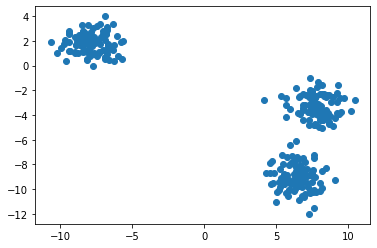

In [4]:
from matplotlib import pyplot as plt 
plt.scatter(x[:,0],x[:,1])

#Import

In [5]:
from sklearn.cluster import KMeans

#Define

In [6]:
KMclust = KMeans(n_clusters=5)

#Train

In [7]:
KMclust.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#Predict

In [8]:
label = KMclust.predict(x)

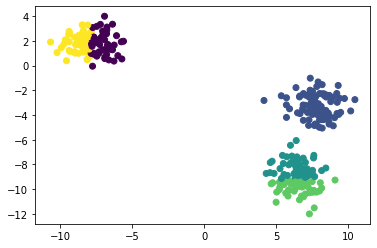

In [9]:
plt.scatter(x[:,0], x[:,1], c=label)

#Color quantization (application of kmea)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Mounted at /content/drive


In [12]:
import cv2
import os

In [13]:
img = cv2.imread(os.path.join(path,'98be141fff52759150148421e0dc11a2.jpg'))

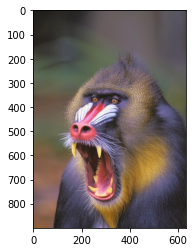

In [14]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [15]:
RGB_img.shape

(900, 632, 3)

#count unique colors

In [16]:
import numpy as np

In [17]:
np.unique(RGB_img).shape

(256,)

#Use K-mean to reduce color from 256 color to 8 colors

In [18]:
#Define
myQuantize = KMeans(n_clusters=8)

In [19]:
img_row = np.reshape(RGB_img,(900*632, 3))
img_row

array([[30, 29, 24],
       [30, 29, 24],
       [30, 29, 24],
       ...,
       [36, 32, 29],
       [35, 31, 28],
       [42, 38, 35]], dtype=uint8)

In [20]:
#Tranin
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
#Predict
res = myQuantize.predict(img_row)
res

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

#Get cluster centers

In [22]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 47.8512998 ,  43.23928605,  43.47667656],
       [134.71423313,  95.37253553,  67.6036519 ],
       [130.88152134, 111.21247253, 122.96861103],
       [ 73.14367822,  69.48790073,  77.33830234],
       [229.30918695, 213.76730806, 225.03867195],
       [ 98.97136188,  94.44704193,  90.8175757 ],
       [181.06109037, 126.87369731,  80.98331778],
       [197.71427479, 155.48566404, 153.17872161]])

In [23]:
Clus_cen.shape

(8, 3)

#Map color name back to image

In [24]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [25]:
new_img_= new_img/255

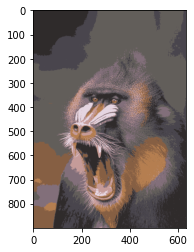

In [26]:
plt.imshow(new_img_)